In [1]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
clf = joblib.load("digits_cls.pkl")

In [6]:
im = cv2.imread("digit-reco-1-in.jpg")

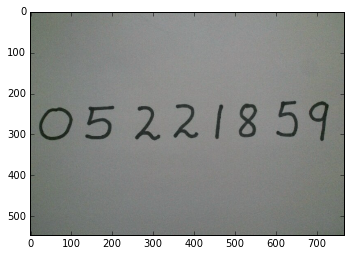

In [7]:
plt.imshow(im)

In [14]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [ ]:
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

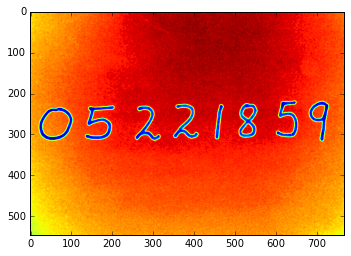

In [17]:
plt.imshow(im_gray)

In [21]:
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV) 

In [22]:
_, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

In [23]:
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
print rects

[(22, 235, 82, 80), (257, 232, 60, 83), (135, 231, 70, 82), (452, 228, 19, 84), (350, 227, 60, 83), (510, 226, 44, 81), (680, 220, 48, 97), (601, 219, 52, 88)]


In [25]:
for rect in rects:
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    
    leng = int(rect[3] * 1.5)
    
    pt1 = max(rect[1] + rect[3]//2 - leng//2, 0)
    pt2 = max(rect[0] + rect[2]//2 - leng//2, 0)
    

    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
    nbr = clf.predict(np.array([roi_hog_fd], 'float64')) 
    
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3) 
    

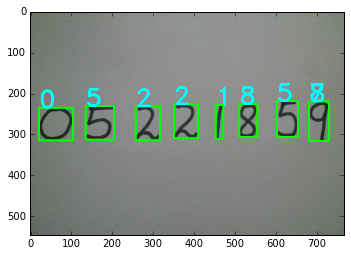

In [49]:
plt.imshow(im)